In [ ]:
import os
import pandas
from sklearn.metrics import f1_score
from autogluon.tabular import TabularPredictor, TabularDataset, FeatureMetadata
from sklearn.model_selection import train_test_split

data = pandas.read_csv(f"{os.getcwd()}/resources/reduced_data.csv")
data = data.drop(columns=['gameId', 'playId', 'nflId'])


In [8]:
new_data = []

for play in data['uniquePlayId'].unique():

    team = {}
    sub = data[data['uniquePlayId'] == play]
    form = None
    for index, row in sub.iterrows():
        team = team | {f"player_{(index%11)+1}_x": row['x'], f"player_{(index%11)+1}_y": row['y'], f"player_{(index%11)+1}_pos": row['position']}
        form = row['offenseFormation']
    new_data.append(team | {"formation": form})

new_data = pandas.DataFrame.from_dict(new_data)

In [9]:
train, test = train_test_split(new_data, random_state=42, test_size = 0.3)

In [10]:
train_tab = TabularDataset(train)
test_tab = TabularDataset(test)

predictor = TabularPredictor(label='formation').fit(train_data=train_tab)
predictions = predictor.predict(test_tab)

No path specified. Models will be saved in: "AutogluonModels\ag-20250323_170719"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       19.46 GB / 31.59 GB (61.6%)
Disk Space Avail:   793.55 GB / 1862.12 GB (42.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'       

[1000]	valid_set's multi_error: 0.257194


	0.7482	 = Validation score   (accuracy)
	8.18s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM ...
	0.7707	 = Validation score   (accuracy)
	6.22s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.6178	 = Validation score   (accuracy)
	1.55s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.6187	 = Validation score   (accuracy)
	2.18s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	0.7626	 = Validation score   (accuracy)
	1215.05s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.5926	 = Validation score   (accuracy)
	0.56s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.589	 = Validation score   (accuracy)
	0.6s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	0.8004	 = Validation score   (accuracy)
	11.49s	 = Training   runtime
	0.04s	 = Va

In [35]:
models = predictor.leaderboard()
models

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.800360,accuracy,0.039062,11.485714,0.039062,11.485714,1,True,11
1,WeightedEnsemble_L2,0.800360,accuracy,0.040062,11.552241,0.001000,0.066526,2,True,14
2,LightGBM,0.770683,accuracy,0.038604,6.218015,0.038604,6.218015,1,True,5
3,CatBoost,0.762590,accuracy,0.010003,1215.052943,0.010003,1215.052943,1,True,8
4,LightGBMXT,0.748201,accuracy,0.085322,8.180133,0.085322,8.180133,1,True,4
5,LightGBMLarge,0.716727,accuracy,0.034577,12.538950,0.034577,12.538950,1,True,13
6,NeuralNetFastAI,0.653777,accuracy,0.020042,9.161836,0.020042,9.161836,1,True,3
7,NeuralNetTorch,0.639388,accuracy,0.006510,30.620016,0.006510,30.620016,1,True,12
8,RandomForestEntr,0.618705,accuracy,0.037679,2.184287,0.037679,2.184287,1,True,7
9,RandomForestGini,0.617806,accuracy,0.049971,1.550185,0.049971,1.550185,1,True,6


{'SHOTGUN': 0.8919061893845882, 'SINGLEBACK': 0.7576136837713809, 'EMPTY': 0.719640179910045, 'I_FORM': 0.5443548387096774, 'PISTOL': 0.24193548387096775, 'JUMBO': 0.2631578947368421, 'WILDCAT': 0.0}


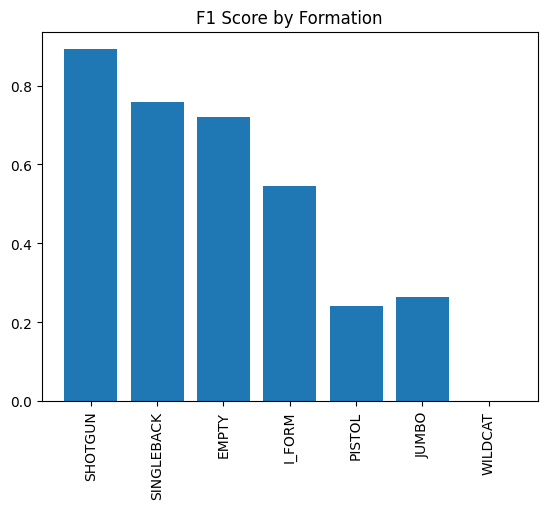

In [46]:
y_true = list(test['formation'].values)
y_pred = list(predictions.values)
labels = test['formation'].unique()

f1 = f1_score(y_true, y_pred, average=None, labels=labels)
d = {label:score for label,score in zip(labels, f1)}
import matplotlib.pyplot as plt
print(d)
plt.bar(d.keys(), d.values())
plt.title("F1 Score by Formation")
plt.xticks(rotation=90)
plt.show()


0                 XGBoost
1     WeightedEnsemble_L2
2                LightGBM
3                CatBoost
4              LightGBMXT
5           LightGBMLarge
6         NeuralNetFastAI
7          NeuralNetTorch
8        RandomForestEntr
9        RandomForestGini
10         ExtraTreesGini
11         ExtraTreesEntr
12         KNeighborsDist
13         KNeighborsUnif
Name: model, dtype: object


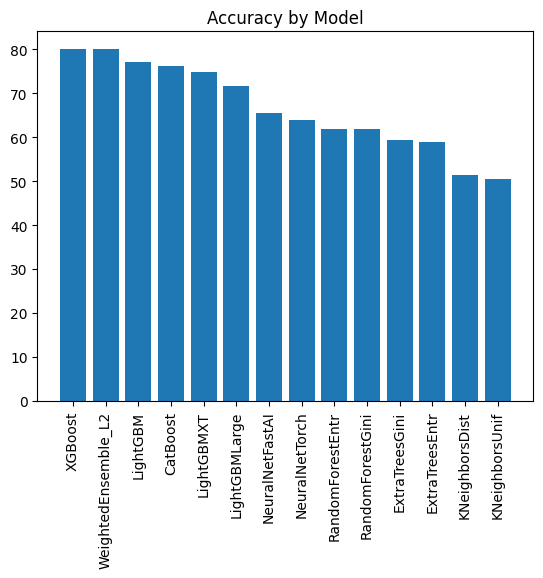

In [45]:
print(models.model)
plt.bar(models.model, (models.score_val*100))
plt.title("Accuracy by Model")
plt.xticks(rotation=90)
plt.show()

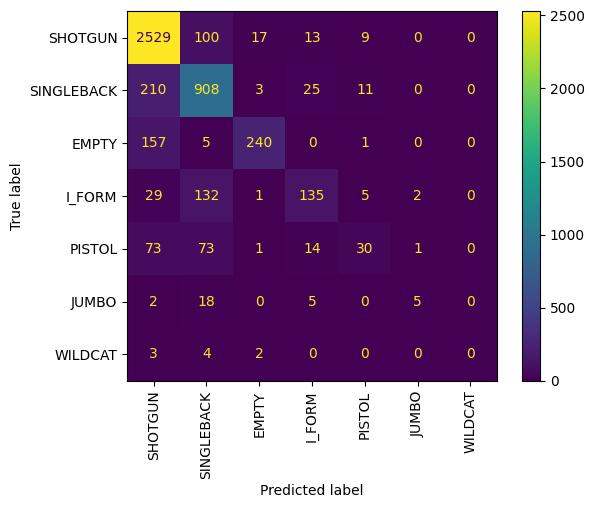

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, labels=labels, xticks_rotation=90)

In [19]:
print(predictor.model_names())

['KNeighborsUnif', 'KNeighborsDist', 'NeuralNetFastAI', 'LightGBMXT', 'LightGBM', 'RandomForestGini', 'RandomForestEntr', 'CatBoost', 'ExtraTreesGini', 'ExtraTreesEntr', 'XGBoost', 'NeuralNetTorch', 'LightGBMLarge', 'WeightedEnsemble_L2']


In [ ]:
predictor